<a href="https://colab.research.google.com/github/sharksurfauto-byte/GGC-Machine-Learning-Workshop-25/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Import Iris Dataset

from sklearn.datasets import load_iris

iris = load_iris()

# print(iris)


In [ ]:
#Import Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier  = DecisionTreeClassifier()
classifier.fit(iris.data, iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

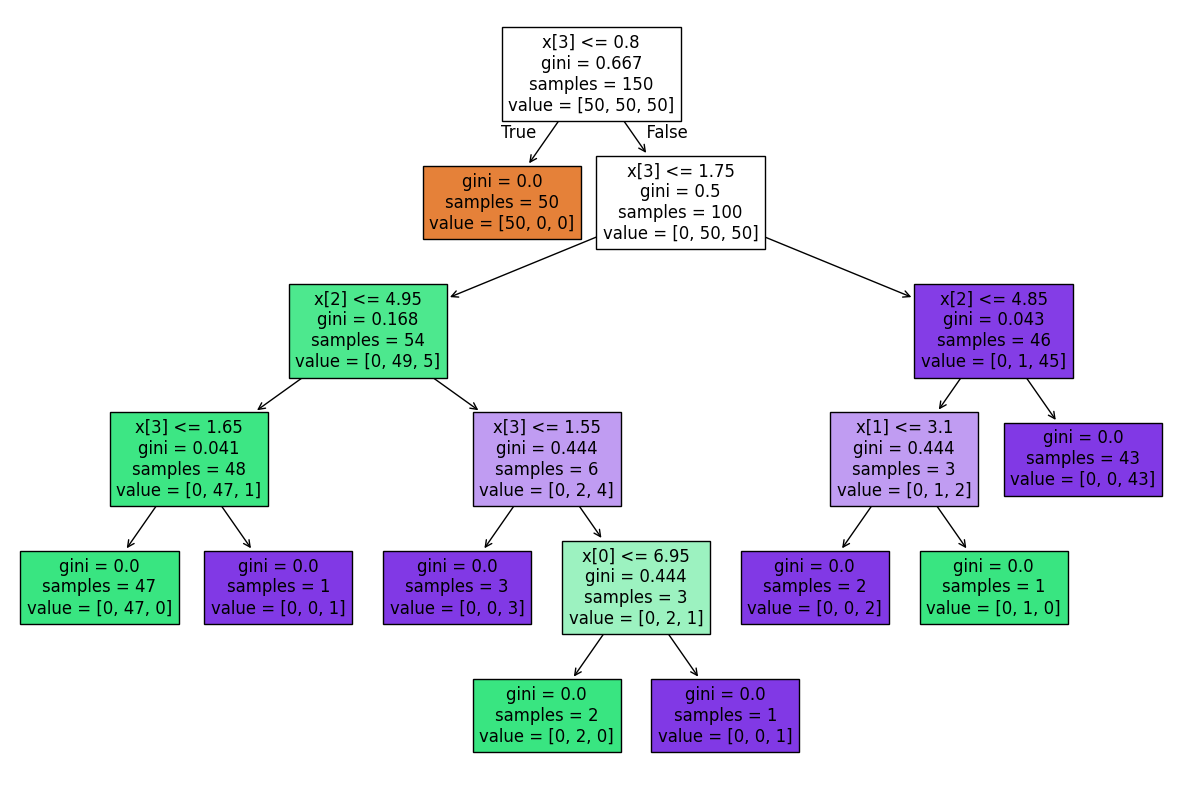

In [ ]:
#Plotting the Decision Tree

from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

In [ ]:
#Training the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 80, random_state = 42)

classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#making prediciton

y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.96      1.00      0.98        22
           2       1.00      0.95      0.97        20

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.98        70
weighted avg       0.99      0.99      0.99        70



In [ ]:
#Trying to uncorporate GridSearchCV:

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3,5], 'min_samples_split': [2,5], 'criterion': ['gini', 'entropy'] }

model = GridSearchCV(classifier, param_grid,scoring = 'accuracy', cv=5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [ ]:
model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [ ]:
model.best_score_

np.float64(0.9)

In [ ]:
#Make prediction

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.96      1.00      0.98        22
           2       1.00      0.95      0.97        20

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.98        70
weighted avg       0.99      0.99      0.99        70



[Text(0.375, 0.875, 'x[2] <= 2.35\ngini = 0.661\nsamples = 80\nvalue = [22, 28, 30]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.499\nsamples = 58\nvalue = [0.0, 28.0, 30.0]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.225\nsamples = 31\nvalue = [0, 27, 4]'),
 Text(0.125, 0.125, 'gini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.071\nsamples = 27\nvalue = [0, 1, 26]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

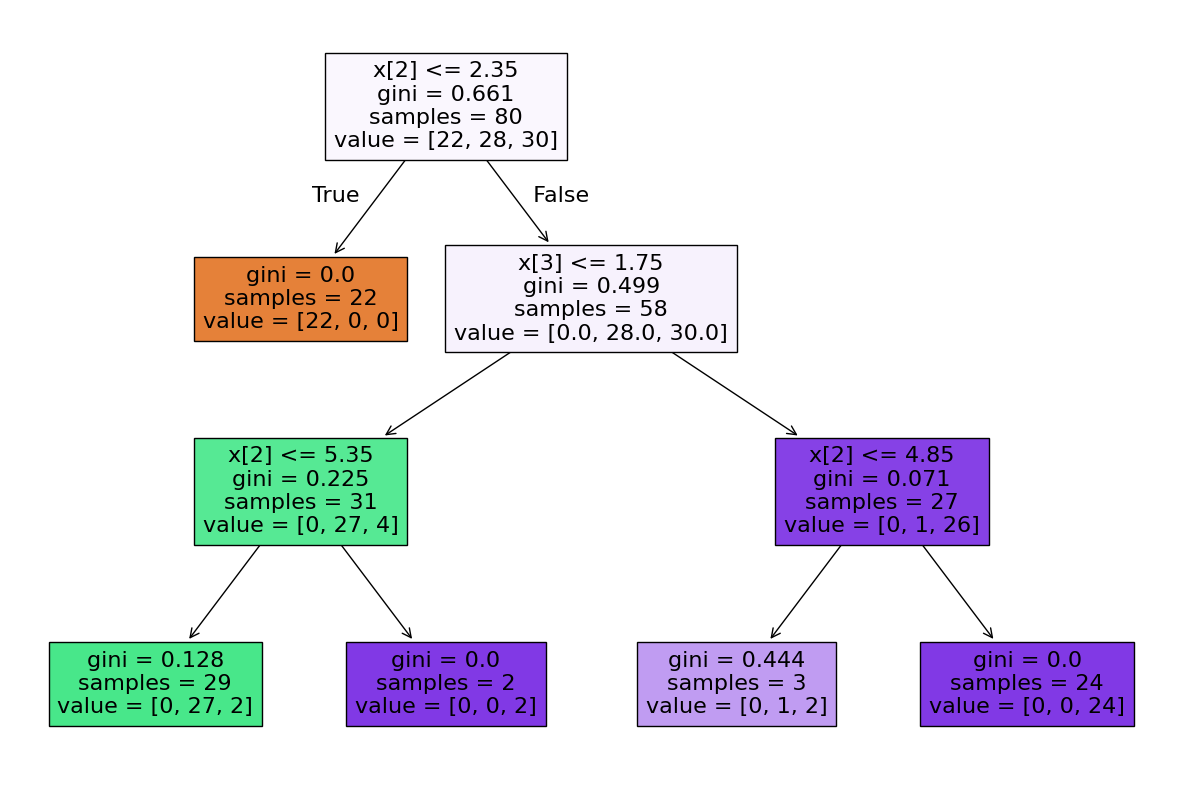

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(model.best_estimator_, filled=True)